<a href="https://colab.research.google.com/github/Sukyeong02/24-1-AI/blob/main/10_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5_(2)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from skimage.transform import resize

count = 0
cap = cv2.VideoCapture('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/Tom and Jerry.mp4')
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
      break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
count = 0
cap = cv2.VideoCapture('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/Tom and Jerry 3.mp4')
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
      break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/mapping.csv')
test = pd.read_csv('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/testing.csv')

In [ ]:
X = [ ]
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)
X = np.array(X)

test_image = []
for img_name in test.Image_ID:
  img = plt.imread('' + img_name)
  test_image.append(img)
test_img = np.array(test_image)

from keras.utils import to_categorical
train_y = to_categorical(data.Class)
test_y = to_categorical(test.Class)

image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
    image.append(a)
X = np.array(image)

test_image = []
for i in range(0,test_img.shape[0]):
  a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
  test_image.append(a)
test_image = np.array(test_image)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)

from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

from keras.callbacks import ModelCheckpoint,EarlyStopping
filepath = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only = True, mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_callback, checkpoint])
print("Done2")

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.9178 - accuracy: 0.6490
Epoch 1: val_loss improved from inf to 1.01509, saving model to weights.best.hdf5
7/7 [==============================] - 8s 625ms/step - loss: 0.9178 - accuracy: 0.6490 - val_loss: 1.0151 - val_accuracy: 0.6778
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3220 - accuracy: 0.8942
Epoch 2: val_loss did not improve from 1.01509
7/7 [==============================] - 3s 431ms/step - loss: 0.3220 - accuracy: 0.8942 - val_loss: 1.1822 - val_accuracy: 0.7222
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9231
Epoch 3: val_loss did not improve from 1.01509
7/7 [==============================] - 3s 449ms/step - loss: 0.2119 - accuracy: 0.9231 - val_loss: 1.8604 - val_accuracy: 0.7111
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.2063 - accuracy: 0.9279
Epoch 4: val_loss did not improve from 1.01509
7/7 [=============

6/6 [==============================] - 1s 122ms/step - loss: 6.7380 - accuracy: 0.3441
Real Test accuracy: 34.41%
6/6 [==============================] - 1s 117ms/step
The screen time of None is  113 seconds
The screen time of Jerry is  36 seconds
The screen time of Tom is  37 seconds


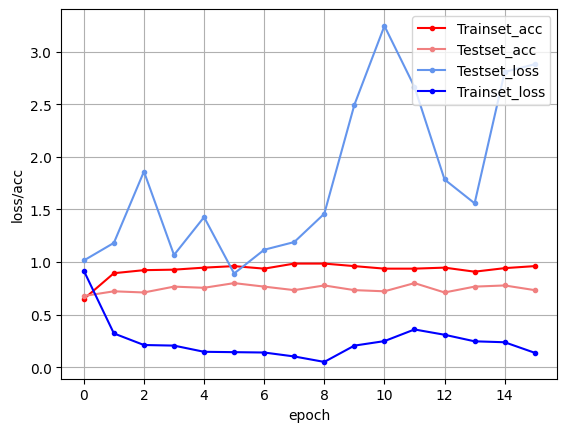

In [ ]:
scores = model.evaluate(test_image, test_y)
print('Real Test %s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

predictions = np.argmax(model.predict(test_image), axis=1)
print('The screen time of None is ', predictions[predictions==0].shape[0], 'seconds')
print('The screen time of Jerry is ', predictions[predictions==1].shape[0], 'seconds')
print('The screen time of Tom is ', predictions[predictions==2].shape[0], 'seconds')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()